In [390]:
#<DESCRIPTION>

# The aim of this project is to analyse the medical insurance costs of insurance packages in USA
# and to try to predict the potencial medical insurance costs depending on the assumptions given.

# In particular, I aim to check how the feature of "smoking/non-smoking" affect number of medical insurance charges paid.
# In addiction, I want to check whether all given features contribute to the final prediction and how can it vary depending
# on the model chosen.

In [391]:
#<DATA COLLECTION>

#data is being imported from the repository of Kamil Pabijan (mentor of the project).

In [392]:
import pandas as pd
import statistics
import numpy as np

In [393]:
#loading the file into the data frame
data_df = pd.read_csv(r'https://raw.githubusercontent.com/Kamil128/ProjektPraktycznyRegresja/main/data/medical_cost/medical_cost.csv',
                 )

In [394]:
#first insights

In [395]:
data_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [396]:
data_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [397]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [398]:
data_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [399]:
# <DATA CLEANING>

# Final notes:
#- 1 duplicate removed,
#- no Nan- values,
#- no outliers, values have right formats and they make sense,
#There is a 1:4 disproportion between smokers and non-smokers observed.

In [400]:
#Checking for duplicates

any(data_df.duplicated())

True

In [401]:
#Selecting duplicate rows except first occurrence based on all columns

duplicate = data_df[data_df.duplicated()]      #alternative: duplicate = df[df.duplicated(['Name', 'Age'])] to look for duplicates in specific columns
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [402]:
#Duplicates removal

data_df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [403]:
# Checking for NaN-values ??????????????????????????????????????????????

any(data_df.isna())

True

In [404]:
data_df[data_df.isna().any(axis=1)]

,age,sex,bmi,children,smoker,region,charges


In [405]:
data_df[data_df.isnull().any(axis=1)]

,age,sex,bmi,children,smoker,region,charges


In [406]:
# Looking for outliers

data_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [407]:
data_df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [408]:
data_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [409]:
data_df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [410]:
data_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [411]:
data_df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [412]:
charges_min=round(data_df['charges'].min())
charges_min

1122

In [413]:
charges_max=round(data_df['charges'].max())
charges_max

63770

In [414]:
charges_mean=round(data_df['charges'].mean())
charges_mean

13270

In [415]:
charges_quantile25=round(data_df['charges'].quantile(q=0.25))
charges_quantile25

4740

In [416]:
charges_quantile50=round(data_df['charges'].quantile(q=0.5))
charges_quantile50

9382

In [417]:
charges_quantile75=round(data_df['charges'].quantile(q=0.75))
charges_quantile75

16640

In [418]:
charges_standard_dev=round(np.std(data_df['charges']),2)
charges_standard_dev

12105.48

In [419]:
#Statistics summary for the data:

statistics_data= {
    "y_min": [charges_min],
    "y_max": [charges_max],
    "y_mean": [charges_mean],
    "charges_quantile25": [charges_quantile25],
    "charges_quantile50": [charges_quantile50],
    "charges_quantile75": [charges_quantile75],
    "y_standard_dev": [charges_standard_dev],
    
}

statistics_df=pd.DataFrame(statistics_data)
statistics_df

,y_min,y_max,y_mean,charges_quantile25,charges_quantile50,charges_quantile75,y_standard_dev
0,1122,63770,13270,4740,9382,16640,12105.48


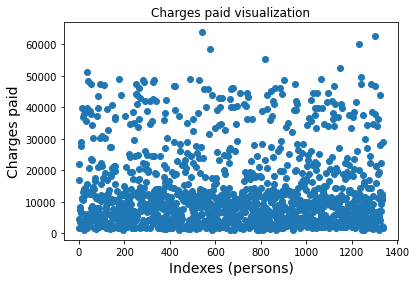

In [420]:
# Picturing charges on the plot
# No outstanding outliers found

import matplotlib.pyplot as plt

plt.scatter(data_df.index, data_df['charges'])

plt.title('Charges paid visualization')
plt.xlabel('Indexes (persons)', fontsize=14)
plt.ylabel('Charges paid', fontsize=14)

plt.show()

In [421]:
#Checking whether the dataset is balanced when it comes to smokers/non-smokers
#The dataset is not balanced, there is a favourable number of non-smokers

smoker=0
non_smoker=0

for person in data_df["smoker"]:
    if person== "yes":
        smoker +=1
    else:
        non_smoker +=1

print("Number od smokers: ", smoker)
print("Number of non-smokers: ", non_smoker)

Number od smokers:  274
Number of non-smokers:  1064


In [422]:
# <Exploratory Data Analysis (EDA)>
# conducted in a separated .ipynb file (Colaboratory file) on github

In [423]:
# <Feature engineering and Modelling>

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [424]:
# 1. MODEL 1: Model including one input variable "Smoker" (referring to smoking) and one output variable (target) "Charges"

X = data_df[['smoker']]
y = data_df['charges']

# One-hot encoding of variable X

X_dummies = pd.get_dummies(X)
print("X_dummies: ", X_dummies)

X_dummies:        smoker_no  smoker_yes
0             0           1
1             1           0
2             1           0
3             1           0
4             1           0
...         ...         ...
1333          1           0
1334          1           0
1335          1           0
1336          1           0
1337          0           1

[1338 rows x 2 columns]


In [425]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=0)

print("X_train:" , X_train)
print("y_train:", y_train)

X_train:       smoker_no  smoker_yes
621           0           1
194           1           0
240           0           1
1168          1           0
1192          1           0
...         ...         ...
763           1           0
835           1           0
1216          1           0
559           1           0
684           1           0

[1070 rows x 2 columns]
y_train: 621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 1070, dtype: float64


In [426]:
print("X_test:" , X_test)
print("y_test:", y_test)

X_test:       smoker_no  smoker_yes
578           1           0
610           1           0
569           0           1
1034          1           0
198           1           0
...         ...         ...
1084          1           0
726           1           0
1132          1           0
725           0           1
963           1           0

[268 rows x 2 columns]
y_test: 578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64


In [427]:
# Choosing a regression model (Linear Regression) and training the model

regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

# The Regression Function no.1 looks as follows:
print("y = ", regr.intercept_, " + ", regr.coef_, "x")

y =  -1.1830338256024368e+17  +  [1.18303383e+17 1.18303383e+17] x


In [428]:
# Getting the prediction

#Prediction for training data:
y_train_pred = regr.predict(X_train) 
#Prediction for test data:
y_test_pred = regr.predict(X_test)

In [429]:
# Model evaluation: metrics

#Mean Squarred Error (MSE):

MSE_train_1= round(mean_squared_error(y_train, y_train_pred, squared=True),2)
MSE_test_1= round(mean_squared_error(y_test, y_test_pred, squared=True),2)

print(f'MSE on train data (Model 1): {MSE_train_1}, MSE on test data (Model1) : {MSE_test_1}')

MSE on train data (Model 1): 56800240.51, MSE on test data (Model1) : 52630321.58


In [430]:
#Root Mean Squarred Error (RMSE):

RMSE_train_1= round(mean_squared_error(y_train, y_train_pred, squared=False),2)
RMSE_test_1= round(mean_squared_error(y_test, y_test_pred, squared=False),2)

print(f'RMSE on train data (Model 1): {RMSE_train_1}, RMSE on test data (Model1) : {RMSE_test_1}')

RMSE on train data (Model 1): 7536.59, RMSE on test data (Model1) : 7254.68


In [431]:
#Coeficient of determination (R^2)

R2_train_1= round(r2_score(y_train, y_train_pred),2)
R2_test_1= round(r2_score(y_test, y_test_pred),2)

print(f'R^2 on train data (Model 1): {R2_train_1}, R^2 on test data (Model 1) : {R2_test_1}')

R^2 on train data (Model 1): 0.6, R^2 on test data (Model 1) : 0.67


In [432]:
#Metrics summary:

metrics_data= {
    "Model number": ["Model 1"],
    "MSE_train" : [MSE_train_1],
    "MSE_test" : [MSE_test_1],
    "RMSE_train" : [RMSE_train_1],
    "RMSE_test" :[RMSE_test_1],
    "R^2_train" :[R2_train_1],
    "R^2_test" :[R2_test_1],
    "Mean_test": [round(statistics.mean(y_test_pred),2)],
    "Std_test": [round(statistics.stdev(y_test_pred),2)],
    "Characteristics" : ["input variable: 'Smoker'"],
}

metrics_df= pd.DataFrame(data=metrics_data)
metrics_df

,Model number,MSE_train,MSE_test,RMSE_train,RMSE_test,R^2_train,R^2_test,Mean_test,Std_test,Characteristics
0,Model 1,56800240.51,52630321.58,7536.59,7254.68,0.6,0.67,13221.01,9063.5,input variable: 'Smoker'


In [433]:
# 2. MODEL 2: Model including two input variables "Smoker" (referring to smoking), "BMI"  and one output variable (target) "Charges"

X = data_df[['smoker','bmi']]
y = data_df['charges']

# One-hot encoding of variable X

X_dummies = pd.get_dummies(X)
print("X_dummies: ", X_dummies)

X_dummies:           bmi  smoker_no  smoker_yes
0     27.900          0           1
1     33.770          1           0
2     33.000          1           0
3     22.705          1           0
4     28.880          1           0
...      ...        ...         ...
1333  30.970          1           0
1334  31.920          1           0
1335  36.850          1           0
1336  25.800          1           0
1337  29.070          0           1

[1338 rows x 3 columns]


In [434]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=0)

In [435]:
# Choosing a regression model (Linear Regression) and training the model

regr2 = linear_model.LinearRegression()

regr2.fit(X_train, y_train)

# The Regression Function no.2 looks as follows:
print("y = ", regr2.intercept_, " + ", regr2.coef_, "x")

y =  8158.933531337067  +  [   386.94616325 -11593.67835295  11593.67835295] x


In [436]:
# Getting the prediction

#Prediction for training data:
y_train_pred = regr2.predict(X_train) 
#Prediction for test data:
y_test_pred = regr2.predict(X_test)

In [437]:
# Model evaluation: metrics

#Mean Squarred Error (MSE):

MSE_train_2= round(mean_squared_error(y_train, y_train_pred, squared=True),2)
MSE_test_2= round(mean_squared_error(y_test, y_test_pred, squared=True),2)

#Root Mean Squarred Error (RMSE):

RMSE_train_2= round(mean_squared_error(y_train, y_train_pred, squared=False),2)
RMSE_test_2= round(mean_squared_error(y_test, y_test_pred, squared=False),2)

#Coeficient of determination (R^2)

R2_train_2= round(r2_score(y_train, y_train_pred),2)
R2_test_2= round(r2_score(y_test, y_test_pred),2)

metrics_data2= {
    "Model number": ["Model 2"],
    "MSE_train" : [MSE_train_2],
    "MSE_test" : [MSE_test_2],
    "RMSE_train" : [RMSE_train_2],
    "RMSE_test" :[RMSE_test_2],
    "R^2_train" :[R2_train_2],
    "R^2_test" :[R2_test_2],
    "Mean_test": [round(statistics.mean(y_test_pred),2)],
    "Std_test": [round(statistics.stdev(y_test_pred),2)],
    "Characteristics" : ["input variables: 'Smoker','BMI'"],
    }

metrics_df2= pd.DataFrame(data=metrics_data2)
pd.concat([metrics_df, metrics_df2])

,Model number,MSE_train,MSE_test,RMSE_train,RMSE_test,R^2_train,R^2_test,Mean_test,Std_test,Characteristics
0,Model 1,56800240.51,52630321.58,7536.59,7254.68,0.60,0.67,13221.01,9063.50,input variable: 'Smoker'
0,Model 2,51004166.22,46797181.74,7141.72,6840.85,0.64,0.71,13089.05,9865.19,"input variables: 'Smoker','BMI'"


In [438]:
# 3. MODEL 3: Model including three input variables "Smoker" (referring to smoking), "BMI", "Age"  and one output variable (target) "Charges"

X = data_df[['smoker','bmi','age']]
y = data_df['charges']

# One-hot encoding of variable X

X_dummies = pd.get_dummies(X)
print("X_dummies: ", X_dummies)

X_dummies:           bmi  age  smoker_no  smoker_yes
0     27.900   19          0           1
1     33.770   18          1           0
2     33.000   28          1           0
3     22.705   33          1           0
4     28.880   32          1           0
...      ...  ...        ...         ...
1333  30.970   50          1           0
1334  31.920   18          1           0
1335  36.850   18          1           0
1336  25.800   21          1           0
1337  29.070   61          0           1

[1338 rows x 4 columns]


In [439]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=0)

In [440]:
# Choosing a regression model (Linear Regression) and training the model

regr3 = linear_model.LinearRegression()

regr3.fit(X_train, y_train)

# The Regression Function no.3 looks as follows:
print("y = ", regr3.intercept_, " + ", regr3.coef_, "x")

y =  240.70922732869622  +  [   321.83997719    257.04066602 -11812.61724417  11812.61724417] x


In [441]:
# Getting the prediction

#Prediction for training data:
y_train_pred = regr3.predict(X_train) 
#Prediction for test data:
y_test_pred = regr3.predict(X_test)

In [442]:
# Model evaluation: metrics

#Mean Squarred Error (MSE):

MSE_train_3= round(mean_squared_error(y_train, y_train_pred, squared=True),2)
MSE_test_3= round(mean_squared_error(y_test, y_test_pred, squared=True),2)

#Root Mean Squarred Error (RMSE):

RMSE_train_3= round(mean_squared_error(y_train, y_train_pred, squared=False),2)
RMSE_test_3= round(mean_squared_error(y_test, y_test_pred, squared=False),2)

#Coeficient of determination (R^2)

R2_train_3= round(r2_score(y_train, y_train_pred),2)
R2_test_3= round(r2_score(y_test, y_test_pred),2)

metrics_data3= {
    "Model number": ["Model 3"],
    "MSE_train" : [MSE_train_3],
    "MSE_test" : [MSE_test_3],
    "RMSE_train" : [RMSE_train_3],
    "RMSE_test" :[RMSE_test_3],
    "R^2_train" :[R2_train_3],
    "R^2_test" :[R2_test_3],
    "Mean_test": [round(statistics.mean(y_test_pred),2)],
    "Std_test": [round(statistics.stdev(y_test_pred),2)],
    "Characteristics" : ["input variables: 'Smoker','BMI','Age'"],
    }

metrics_df3= pd.DataFrame(data=metrics_data3)
pd.concat([metrics_df, metrics_df2, metrics_df3])

,Model number,MSE_train,MSE_test,RMSE_train,RMSE_test,R^2_train,R^2_test,Mean_test,Std_test,Characteristics
0,Model 1,56800240.51,52630321.58,7536.59,7254.68,0.60,0.67,13221.01,9063.50,input variable: 'Smoker'
0,Model 2,51004166.22,46797181.74,7141.72,6840.85,0.64,0.71,13089.05,9865.19,"input variables: 'Smoker','BMI'"
0,Model 3,38099093.84,32693237.94,6172.45,5717.80,0.73,0.79,13258.44,10865.36,"input variables: 'Smoker','BMI','Age'"


In [443]:
# 4. MODEL 4: Model including four input variables "Smoker" (referring to smoking), "BMI", "Age", "Children"  and one output variable (target) "Charges"

X = data_df[['smoker','bmi','age','children']]
y = data_df['charges']

# One-hot encoding of variable X

X_dummies = pd.get_dummies(X)
print("X_dummies: ", X_dummies)

X_dummies:           bmi  age  children  smoker_no  smoker_yes
0     27.900   19         0          0           1
1     33.770   18         1          1           0
2     33.000   28         3          1           0
3     22.705   33         0          1           0
4     28.880   32         0          1           0
...      ...  ...       ...        ...         ...
1333  30.970   50         3          1           0
1334  31.920   18         0          1           0
1335  36.850   18         0          1           0
1336  25.800   21         0          1           0
1337  29.070   61         0          0           1

[1338 rows x 5 columns]


In [444]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=0)

# Choosing a regression model (Linear Regression) and training the model

regr4 = linear_model.LinearRegression()
regr4.fit(X_train, y_train)

# The egression function no.4 looks as follows:
print("y = ", regr4.intercept_, " + ", regr4.coef_, "x")

y =  -116.75959288404556  +  [   320.6190203     254.97145832    430.54569459 -11793.7785639
  11793.7785639 ] x


In [445]:
# Getting the prediction

#Prediction for training data:
y_train_pred = regr4.predict(X_train) 
#Prediction for test data:
y_test_pred = regr4.predict(X_test)

In [446]:
# Model evaluation: metrics

#Mean Squarred Error (MSE):

MSE_train_4= round(mean_squared_error(y_train, y_train_pred, squared=True),2)
MSE_test_4= round(mean_squared_error(y_test, y_test_pred, squared=True),2)

#Root Mean Squarred Error (RMSE):

RMSE_train_4= round(mean_squared_error(y_train, y_train_pred, squared=False),2)
RMSE_test_4= round(mean_squared_error(y_test, y_test_pred, squared=False),2)

#Coeficient of determination (R^2)

R2_train_4= round(r2_score(y_train, y_train_pred),2)
R2_test_4= round(r2_score(y_test, y_test_pred),2)

metrics_data4= {
    "Model number": ["Model 4"],
    "MSE_train" : [MSE_train_4],
    "MSE_test" : [MSE_test_4],
    "RMSE_train" : [RMSE_train_4],
    "RMSE_test" :[RMSE_test_4],
    "R^2_train" :[R2_train_4],
    "R^2_test" :[R2_test_4],
    "Mean_test": [round(statistics.mean(y_test_pred),2)],
    "Std_test": [round(statistics.stdev(y_test_pred),2)],
    "Characteristics" : ["input variables: 'Smoker','BMI','Age','Children'"],
    }

metrics_df4= pd.DataFrame(data=metrics_data4)
pd.concat([metrics_df, metrics_df2, metrics_df3, metrics_df4])

,Model number,MSE_train,MSE_test,RMSE_train,RMSE_test,R^2_train,R^2_test,Mean_test,Std_test,Characteristics
0,Model 1,56800240.51,52630321.58,7536.59,7254.68,0.60,0.67,13221.01,9063.50,input variable: 'Smoker'
0,Model 2,51004166.22,46797181.74,7141.72,6840.85,0.64,0.71,13089.05,9865.19,"input variables: 'Smoker','BMI'"
0,Model 3,38099093.84,32693237.94,6172.45,5717.80,0.73,0.79,13258.44,10865.36,"input variables: 'Smoker','BMI','Age'"
0,Model 4,37828889.75,32171708.57,6150.52,5672.01,0.74,0.80,13290.90,10814.87,"input variables: 'Smoker','BMI','Age','Children'"


In [447]:
# 5. MODEL 5: Model including five input variables "Smoker" (referring to smoking), "BMI", "Age","Children","Sex"  and one output variable (target) "Charges"

X = data_df[['smoker','bmi','age','children','sex']]
y = data_df['charges']

# One-hot encoding of variable X

X_dummies = pd.get_dummies(X)
print("X_dummies: ", X_dummies)

X_dummies:           bmi  age  children  smoker_no  smoker_yes  sex_female  sex_male
0     27.900   19         0          0           1           1         0
1     33.770   18         1          1           0           0         1
2     33.000   28         3          1           0           0         1
3     22.705   33         0          1           0           0         1
4     28.880   32         0          1           0           0         1
...      ...  ...       ...        ...         ...         ...       ...
1333  30.970   50         3          1           0           0         1
1334  31.920   18         0          1           0           1         0
1335  36.850   18         0          1           0           1         0
1336  25.800   21         0          1           0           1         0
1337  29.070   61         0          0           1           1         0

[1338 rows x 7 columns]


In [448]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=0)

# Choosing a regression model (Linear Regression) and training the model

regr5 = linear_model.LinearRegression()
regr5.fit(X_train, y_train)

# The Regression Function no.5 looks as follows:
print("y = ", regr5.intercept_, " + ", regr5.coef_, "x")

y =  -118.32010338561486  +  [ 3.20693337e+02  2.54952280e+02  4.30809389e+02 -1.17945124e+04
  1.17945124e+04  1.17278966e+01 -1.17278966e+01] x


In [449]:
# Getting the prediction

#Prediction for training data:
y_train_pred = regr5.predict(X_train) 
#Prediction for test data:
y_test_pred = regr5.predict(X_test)

In [450]:
# Model evaluation: metrics

#Mean Squarred Error (MSE):

MSE_train_5= round(mean_squared_error(y_train, y_train_pred, squared=True),2)
MSE_test_5= round(mean_squared_error(y_test, y_test_pred, squared=True),2)

#Root Mean Squarred Error (RMSE):

RMSE_train_5= round(mean_squared_error(y_train, y_train_pred, squared=False),2)
RMSE_test_5= round(mean_squared_error(y_test, y_test_pred, squared=False),2)

#Coeficient of determination (R^2)

R2_train_5= round(r2_score(y_train, y_train_pred),2)
R2_test_5= round(r2_score(y_test, y_test_pred),2)

metrics_data5= {
    "Model number": ["Model 5"],
    "MSE_train" : [MSE_train_5],
    "MSE_test" : [MSE_test_5],
    "RMSE_train" : [RMSE_train_5],
    "RMSE_test" :[RMSE_test_5],
    "R^2_train" :[R2_train_5],
    "R^2_test" :[R2_test_5],
    "Mean_test": [round(statistics.mean(y_test_pred),2)],
    "Std_test": [round(statistics.stdev(y_test_pred),2)],
    "Characteristics" : ["input variables: 'Smoker','BMI','Age','Children', 'Sex'"],
    }

metrics_df5= pd.DataFrame(data=metrics_data5)
pd.concat([metrics_df, metrics_df2, metrics_df3, metrics_df4, metrics_df5])

,Model number,MSE_train,MSE_test,RMSE_train,RMSE_test,R^2_train,R^2_test,Mean_test,Std_test,Characteristics
0,Model 1,56800240.51,52630321.58,7536.59,7254.68,0.60,0.67,13221.01,9063.50,input variable: 'Smoker'
0,Model 2,51004166.22,46797181.74,7141.72,6840.85,0.64,0.71,13089.05,9865.19,"input variables: 'Smoker','BMI'"
0,Model 3,38099093.84,32693237.94,6172.45,5717.80,0.73,0.79,13258.44,10865.36,"input variables: 'Smoker','BMI','Age'"
0,Model 4,37828889.75,32171708.57,6150.52,5672.01,0.74,0.80,13290.90,10814.87,"input variables: 'Smoker','BMI','Age','Children'"
0,Model 5,37828752.95,32165826.64,6150.51,5671.49,0.74,0.80,13289.39,10813.57,"input variables: 'Smoker','BMI','Age','Childre..."


In [451]:
# 6. MODEL 6: Model including five input variables "Smoker" (referring to smoking), "BMI", "Age","Children","Region"  and one output variable (target) "Charges"

X = data_df[['smoker','bmi','age','children','region']]
y = data_df['charges']

# One-hot encoding of variable X

X_dummies = pd.get_dummies(X)
print("X_dummies: ", X_dummies)

X_dummies:           bmi  age  children  smoker_no  smoker_yes  region_northeast  \
0     27.900   19         0          0           1                 0   
1     33.770   18         1          1           0                 0   
2     33.000   28         3          1           0                 0   
3     22.705   33         0          1           0                 0   
4     28.880   32         0          1           0                 0   
...      ...  ...       ...        ...         ...               ...   
1333  30.970   50         3          1           0                 0   
1334  31.920   18         0          1           0                 1   
1335  36.850   18         0          1           0                 0   
1336  25.800   21         0          1           0                 0   
1337  29.070   61         0          0           1                 0   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1

In [452]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=0)

# Choosing a regression model (Linear Regression) and training the model

regr6 = linear_model.LinearRegression()
regr6.fit(X_train, y_train)

# The Regression Function no.6 looks as follows:
print("y = ", regr6.intercept_, " + ", regr6.coef_, "x")

y =  -516.3589627668625  +  [   335.92334322    253.71289612    436.72852645 -11802.04839381
  11802.04839381    483.80313267    223.92508718   -429.78382223
   -277.94439762] x


In [453]:
# Getting the prediction

#Prediction for training data:
y_train_pred = regr6.predict(X_train) 
#Prediction for test data:
y_test_pred = regr6.predict(X_test)

In [454]:
# Model evaluation: metrics

#Mean Squarred Error (MSE):

MSE_train_6= round(mean_squared_error(y_train, y_train_pred, squared=True),2)
MSE_test_6= round(mean_squared_error(y_test, y_test_pred, squared=True),2)

#Root Mean Squarred Error (RMSE):

RMSE_train_6= round(mean_squared_error(y_train, y_train_pred, squared=False),2)
RMSE_test_6= round(mean_squared_error(y_test, y_test_pred, squared=False),2)

#Coeficient of determination (R^2)

R2_train_6= round(r2_score(y_train, y_train_pred),2)
R2_test_6= round(r2_score(y_test, y_test_pred),2)

metrics_data6= {
    "Model number": ["Model 6"],
    "MSE_train" : [MSE_train_6],
    "MSE_test" : [MSE_test_6],
    "RMSE_train" : [RMSE_train_6],
    "RMSE_test" :[RMSE_test_6],
    "R^2_train" :[R2_train_6],
    "R^2_test" :[R2_test_6],
    "Mean_test": [round(statistics.mean(y_test_pred),2)],
    "Std_test": [round(statistics.stdev(y_test_pred),2)],
    "Characteristics" : ["input variables: 'Smoker','BMI','Age','Children', 'Sex'"],
    }

metrics_df6= pd.DataFrame(data=metrics_data6)
pd.concat([metrics_df, metrics_df2, metrics_df3, metrics_df4, metrics_df5, metrics_df6])

,Model number,MSE_train,MSE_test,RMSE_train,RMSE_test,R^2_train,R^2_test,Mean_test,Std_test,Characteristics
0,Model 1,56800240.51,52630321.58,7536.59,7254.68,0.60,0.67,13221.01,9063.50,input variable: 'Smoker'
0,Model 2,51004166.22,46797181.74,7141.72,6840.85,0.64,0.71,13089.05,9865.19,"input variables: 'Smoker','BMI'"
0,Model 3,38099093.84,32693237.94,6172.45,5717.80,0.73,0.79,13258.44,10865.36,"input variables: 'Smoker','BMI','Age'"
0,Model 4,37828889.75,32171708.57,6150.52,5672.01,0.74,0.80,13290.90,10814.87,"input variables: 'Smoker','BMI','Age','Children'"
0,Model 5,37828752.95,32165826.64,6150.51,5671.49,0.74,0.80,13289.39,10813.57,"input variables: 'Smoker','BMI','Age','Childre..."
0,Model 6,37701592.54,31832216.47,6140.16,5642.00,0.74,0.80,13337.51,10793.60,"input variables: 'Smoker','BMI','Age','Childre..."


In [455]:
# Conclusion regarding Models no. 1-6

# The best model so far proved to be the model including four input variables (independent variables): 
# -"Smoker" (smoking/non-smoking of the person),
# -"BMI" (the bmi of the person),
# -"Age" (age of the person),
# -"Children" (how many children does the person have).
# These input variables proved to be most valuable for the model, even though they did not pop out in the correlation matrix as highly correlated with the target value.

# Including of any other input variables ("Sex" or"Region") was not bringing more merit.

# There is a huge difference between MSE and RMSE error value. This is because MSE tends to "punish" the model more for large errors as the calculated errors are squared, 
# while RMSE errors are squarred root, so the figures tend to be lower. 
# In both, we can observe that error values were falling when adding more input variables, until it shown no significant difference anymore (for input variables "Sex" and "Region").

# Comparing RMSE test values with mean and standard deviation values we can see that the RMSE values fall when the statistics of the model
# are getting better, however there is no strategic change in standard deviation or mean of the data to be found. 

#The Coeficient of determination (R^2) for the first model could indicate overfitting of the model (R^2 for the training data was higher than for the test data).
# This effect is not observed from the second model onwards.
# The best score we could observe from Model no.4 and onwards (however Model no. 5 and no. 6 had no significant improvement when it comes to R^2 value).
# The R^2 score = 80% for the test data means that 80% of predicted data matched actual data samples.  
